In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics as stats

In [2]:
SEEDS = [42, 43, 44, 45, 46]

In [3]:
percents = []
df_accs_no_pretrain, df_lls_no_pretrain = pd.DataFrame(), pd.DataFrame()
df_accs_pretrain, df_lls_pretrain = pd.DataFrame(), pd.DataFrame()

for SEED in SEEDS:
    df_no_pretrain = pd.read_csv(f"/home/ss26/Projects/Smart-Tools/progress/apr5/Human trained + no pretraining (Seed: {SEED}).csv").drop(columns=["Unnamed: 0"])    
    df_accs_no_pretrain[f'Seed: {SEED}'] = df_no_pretrain['accuracy']
    df_lls_no_pretrain[f'Seed: {SEED}'] = df_no_pretrain['logloss']

    df_pretrain = pd.read_csv(f"/home/ss26/Projects/Smart-Tools/progress/apr5/Human trained + Yaskawa pretraining (Seed: {SEED}).csv").drop(columns=["Unnamed: 0"])
    df_accs_pretrain[f'Seed: {SEED}'] = df_pretrain['accuracy']
    df_lls_pretrain[f'Seed: {SEED}'] = df_pretrain['logloss']

    percents += [df_no_pretrain['percent']]


In [11]:
def plot_data_vs_acc_logloss(percents, accs, title):
    plt.cla()
    plt.plot([percent*100 for percent in percents], [acc*100 for acc in accs], 'xg--')
    plt.title(f"Test Accuracy vs Dataset volume - " + title)
    plt.xlabel("Percentage of Data (in %)")
    plt.ylabel("Accuracy (in %)")
    plt.savefig("/home/ss26/Projects/Smart-Tools/progress/apr5/accs_vs_data/" + title + ".png", dpi=600)

def plot_data_vs_logloss(percents, lls, title):
    plt.cla()
    plt.plot([percent*100 for percent in percents], lls, 'xm--')
    plt.title(f"Log-Loss vs Dataset volume - " + title)
    plt.xlabel("Percentage of Data (in %)")
    plt.ylabel("Log Loss")
    plt.savefig("/home/ss26/Projects/Smart-Tools/progress/apr5/lls_vs_data/" + title + ".png", dpi=600)

In [4]:
percents = list(df_no_pretrain['percent'])

accs_no_pretrain_mean, accs_no_pretrain_std, lls_no_pretrain_mean, lls_no_pretrain_std = [], [], [], []
accs_pretrain_mean, accs_pretrain_std, lls_pretrain_mean, lls_pretrain_std = [], [], [], []

for i in range(len(percents)):
    accs_no_pretrain_mean += [stats.mean([
        df_accs_no_pretrain['Seed: 42'][i], 
        df_accs_no_pretrain['Seed: 43'][i], 
        df_accs_no_pretrain['Seed: 44'][i], 
        df_accs_no_pretrain['Seed: 45'][i], 
        df_accs_no_pretrain['Seed: 46'][i]]
        )]
    
    accs_no_pretrain_std += [stats.stdev([
        df_accs_no_pretrain['Seed: 42'][i], 
        df_accs_no_pretrain['Seed: 43'][i], 
        df_accs_no_pretrain['Seed: 44'][i], 
        df_accs_no_pretrain['Seed: 45'][i], 
        df_accs_no_pretrain['Seed: 46'][i]]
        )]

    lls_no_pretrain_mean += [stats.mean([
        df_lls_no_pretrain['Seed: 42'][i], 
        df_lls_no_pretrain['Seed: 43'][i], 
        df_lls_no_pretrain['Seed: 44'][i], 
        df_lls_no_pretrain['Seed: 45'][i], 
        df_lls_no_pretrain['Seed: 46'][i]]
        )]
    
    lls_no_pretrain_std += [stats.stdev([
        df_lls_no_pretrain['Seed: 42'][i], 
        df_lls_no_pretrain['Seed: 43'][i], 
        df_lls_no_pretrain['Seed: 44'][i], 
        df_lls_no_pretrain['Seed: 45'][i], 
        df_lls_no_pretrain['Seed: 46'][i]]
        )]
    
    accs_pretrain_mean += [stats.mean([
        df_accs_pretrain['Seed: 42'][i], 
        df_accs_pretrain['Seed: 43'][i], 
        df_accs_pretrain['Seed: 44'][i], 
        df_accs_pretrain['Seed: 45'][i], 
        df_accs_pretrain['Seed: 46'][i]]
        )]
    
    accs_pretrain_std += [stats.stdev([
        df_accs_pretrain['Seed: 42'][i], 
        df_accs_pretrain['Seed: 43'][i], 
        df_accs_pretrain['Seed: 44'][i], 
        df_accs_pretrain['Seed: 45'][i], 
        df_accs_pretrain['Seed: 46'][i]]
        )]

    lls_pretrain_mean += [stats.mean([
        df_lls_pretrain['Seed: 42'][i], 
        df_lls_pretrain['Seed: 43'][i], 
        df_lls_pretrain['Seed: 44'][i], 
        df_lls_pretrain['Seed: 45'][i], 
        df_lls_pretrain['Seed: 46'][i]]
        )]
    
    lls_pretrain_std += [stats.stdev([
        df_lls_pretrain['Seed: 42'][i], 
        df_lls_pretrain['Seed: 43'][i], 
        df_lls_pretrain['Seed: 44'][i], 
        df_lls_pretrain['Seed: 45'][i], 
        df_lls_pretrain['Seed: 46'][i]]
        )]

In [13]:
percents_x_100 = [percent*100 for percent in percents]

accs_no_pretrain_stds_plus = [first + second for first, second in zip([acc*100 for acc in accs_no_pretrain_mean], [std for std in accs_no_pretrain_std])]
accs_no_pretrain_stds_minus = [first - second for first, second in zip([acc*100 for acc in accs_no_pretrain_mean], [std for std in accs_no_pretrain_std])]

accs_pretrain_stds_plus = [first + second for first, second in zip([acc*100 for acc in accs_pretrain_mean], [std for std in accs_pretrain_std])]
accs_pretrain_stds_minus = [first - second for first, second in zip([acc*100 for acc in accs_pretrain_mean], [std for std in accs_pretrain_std])]

lls_no_pretrain_stds_plus = [first + second for first, second in zip([ll for ll in lls_no_pretrain_mean], [std for std in lls_no_pretrain_std])]
lls_no_pretrain_stds_minus = [first - second for first, second in zip([ll for ll in lls_no_pretrain_mean], [std for std in lls_no_pretrain_std])]

lls_pretrain_stds_plus = [first + second for first, second in zip([ll for ll in lls_pretrain_mean], [std for std in lls_pretrain_std])]
lls_pretrain_stds_minus = [first - second for first, second in zip([ll for ll in lls_pretrain_mean], [std for std in lls_pretrain_std])]



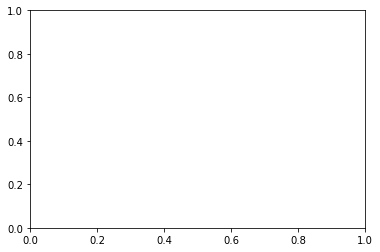

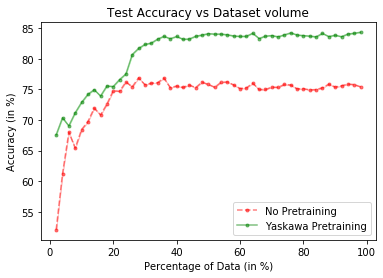

In [54]:
# plot combined pretrain and no pretrain
plt.cla()
fig, ax = plt.subplots()
ax.plot(percents_x_100, [acc*100 for acc in accs_no_pretrain_mean], '.r--', alpha=0.5)
ax.fill_between(percents_x_100, accs_no_pretrain_stds_plus, accs_no_pretrain_stds_minus, color='#ff8080', alpha=0.4)
ax.plot([percent*100 for percent in percents], [acc*100 for acc in accs_pretrain_mean], '.g-', alpha=0.5)
ax.fill_between(percents_x_100, accs_pretrain_stds_plus, accs_pretrain_stds_minus, color='#90ee90', alpha=0.4)
ax.set_title(f"Test Accuracy vs Dataset volume")
ax.set_xlabel("Percentage of Data (in %)")
ax.set_ylabel("Accuracy (in %)")
ax.legend(["No Pretraining", "Yaskawa Pretraining"])
# fig.show()
plt.savefig("/home/ss26/Projects/Smart-Tools/progress/apr5/accs_vs_data/pretrain_no_pretrain_dropout.png", dpi=600)


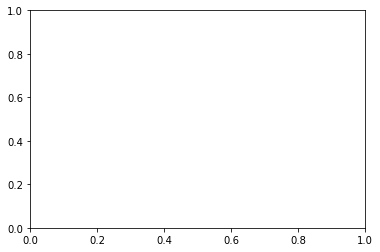

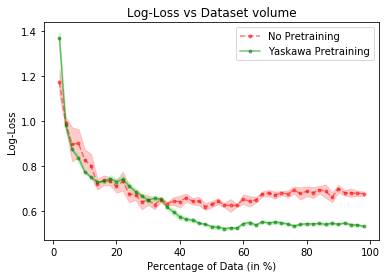

In [16]:
# plot combined pretrain and no pretrain
plt.cla()
fig, ax = plt.subplots()
ax.plot(percents_x_100, lls_no_pretrain_mean, '.r--', alpha=0.5)
ax.fill_between(percents_x_100, lls_no_pretrain_stds_plus, lls_no_pretrain_stds_minus, color='#ff8080', alpha=0.4)
ax.plot(percents_x_100, lls_pretrain_mean, '.g-', alpha=0.5)
ax.fill_between(percents_x_100, lls_pretrain_stds_plus, lls_pretrain_stds_minus, color='#90ee90', alpha=0.4)
ax.set_title(f"Log-Loss vs Dataset volume")
ax.set_xlabel("Percentage of Data (in %)")
ax.set_ylabel("Log-Loss")
ax.legend(["No Pretraining", "Yaskawa Pretraining"])
# fig.show()
plt.savefig("/home/ss26/Projects/Smart-Tools/progress/apr5/lls_vs_data/pretrain_no_pretrain_dropout.png", dpi=600)

In [53]:
print(list(zip(lls_no_pretrain_stds_minus, lls_no_pretrain_stds_plus)))

[(117.35433487090732, 117.46810547939073), (99.16455397413527, 99.21573663622034), (89.5937027202807, 89.74432795036691), (90.14608673866664, 90.27149932132642), (82.62338007459432, 82.7192659505698), (80.03620971479455, 80.1416087502906), (71.88262637231408, 71.92957241561611), (73.73942744287825, 73.78251986754782), (73.17888072655435, 73.21406258636398), (71.01495925033817, 71.07203119962057), (73.19222746785509, 73.27598075434373), (67.59164649597574, 67.66537838657234), (67.3097355514304, 67.35597344169895), (64.11054628518986, 64.1776554657749), (64.83059703431115, 64.87374784834324), (62.900905505121735, 62.94112270814495), (65.13325209064564, 65.15676758113594), (63.309422032376894, 63.324388727187646), (64.46105633806947, 64.4958400577613), (64.13069387607547, 64.18322505422768), (65.95630889650288, 65.99236919708791), (64.3531853836259, 64.38118444499797), (64.3943260998942, 64.43239868880288), (61.97348658725505, 62.00306509631217), (63.00430624402989, 63.032935154654055), (

In [4]:
df_human0 = pd.read_parquet("/home/ss26/Projects/Smart-Tools/data/F2021_Processed_0.parquet")
df_human1 = pd.read_parquet("/home/ss26/Projects/Smart-Tools/data/F2021_Processed_1.parquet")
df_human2 = pd.read_parquet("/home/ss26/Projects/Smart-Tools/data/F2021_Processed_2.parquet")
df_human3 = pd.read_parquet("/home/ss26/Projects/Smart-Tools/data/F2021_Processed_3.parquet")
df_human = pd.concat([df_human0, df_human1, df_human2, df_human3], ignore_index=True)
df_human

,accX_min,accX_max,accX_mean,accX_kurt,accX_sem,accX_std,accX_var,accX_skew,accX_mad,accX_sum,...,Srms_max,Srms_mean,Srms_kurt,Srms_sem,Srms_std,Srms_var,Srms_skew,Srms_mad,Srms_sum,Activity
0,-0.759935,-0.117976,-0.660314,2.451151,0.004800,0.154784,0.023958,1.859007,0.116826,-686.726670,...,17965.914363,13991.341687,4.945233,27.811847,896.905100,8.044388e+05,1.796405,629.798183,1.455100e+07,0
1,-0.759991,-0.117976,-0.672374,4.275537,0.004323,0.139415,0.019436,2.236761,0.097110,-699.269043,...,21223.085111,14408.752317,4.794061,42.808428,1380.530324,1.905864e+06,1.946690,981.978543,1.498510e+07,0
2,-0.759991,-0.321369,-0.700097,5.315347,0.002600,0.083840,0.007029,2.380582,0.055634,-728.100849,...,21223.085111,15046.726700,0.673688,52.836997,1703.941950,2.903418e+06,1.134693,1365.327573,1.564860e+07,0
3,-0.759968,-0.230558,-0.697515,5.230066,0.003186,0.102732,0.010554,2.421432,0.068998,-725.415396,...,19413.955078,15009.799207,0.012322,50.777892,1637.537814,2.681530e+06,0.880313,1280.901589,1.561019e+07,0
4,-0.759996,-0.230558,-0.720303,15.509190,0.002521,0.081288,0.006608,3.886364,0.041223,-749.115427,...,18669.000601,14388.291123,1.408509,40.004742,1290.114162,1.664395e+06,1.146315,913.160796,1.496382e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5363,-1.138808,0.606445,-0.434048,-1.698462,0.018192,0.586668,0.344180,0.191789,0.557026,-451.409405,...,39963.232422,26269.250130,-1.620564,283.335062,9137.281199,8.348991e+07,-0.188507,8405.941095,2.732002e+07,3
5364,-1.138808,0.623037,-0.430203,-1.583459,0.017944,0.578681,0.334872,0.221694,0.540949,-447.410870,...,39972.816857,26703.690854,-1.452073,264.419703,8527.279198,7.271449e+07,-0.363768,7644.382886,2.777184e+07,3
5365,-1.138526,0.723346,-0.479591,-1.490666,0.018346,0.591633,0.350030,0.431017,0.552278,-498.774682,...,39972.816857,25512.032910,-1.741038,301.556514,9724.905355,9.457378e+07,0.029392,9210.962045,2.653251e+07,3
5366,-1.152179,0.723346,-0.478088,-1.610253,0.020589,0.617675,0.381522,0.412649,0.589354,-430.279499,...,39990.593450,25487.627928,-1.840882,356.064512,10681.935347,1.141037e+08,0.165200,10303.962986,2.293887e+07,3


In [5]:
df_robot0 = pd.read_parquet("/home/ss26/Projects/Smart-Tools/data/S2023_Processed_0.parquet")
df_robot1 = pd.read_parquet("/home/ss26/Projects/Smart-Tools/data/S2023_Processed_1.parquet")
df_robot2 = pd.read_parquet("/home/ss26/Projects/Smart-Tools/data/S2023_Processed_2.parquet")
df_robot3 = pd.read_parquet("/home/ss26/Projects/Smart-Tools/data/S2023_Processed_3.parquet")
df_robot = pd.concat([df_robot0, df_robot1, df_robot2, df_robot3], ignore_index=True)
df_robot

,accX_min,accX_max,accX_mean,accX_kurt,accX_sem,accX_std,accX_var,accX_skew,accX_mad,accX_sum,...,Srms_max,Srms_mean,Srms_kurt,Srms_sem,Srms_std,Srms_var,Srms_skew,Srms_mad,Srms_sum,Activity
0,-1.044579,-0.994817,-1.023268,-0.784582,0.000345,0.011129,0.000124,0.388362,0.009177,-1064.198228,...,13050.062312,9209.814665,-1.482427,76.434566,2464.940674,6.075933e+06,-0.110534,2208.229610,9.578207e+06,0
1,-1.051720,-0.994817,-1.016983,-0.398923,0.000365,0.011775,0.000139,-0.616339,0.010071,-1057.661964,...,12558.003080,8058.359375,-1.374248,72.704386,2344.645989,5.497365e+06,0.518030,2170.746945,8.380694e+06,0
2,-1.051720,-0.996967,-1.014756,0.308064,0.000354,0.011420,0.000130,-1.076427,0.009481,-1055.346187,...,12558.003080,7517.410681,-0.757938,69.866059,2253.112708,5.076517e+06,0.940747,2008.654881,7.818107e+06,0
3,-1.035405,-0.999714,-1.014453,-1.144397,0.000302,0.009724,0.000095,-0.566606,0.008751,-1055.031137,...,12441.953726,7272.065017,-0.766294,62.449540,2013.937165,4.055943e+06,0.905799,1797.513668,7.562948e+06,0
4,-1.041011,-0.999714,-1.016605,-1.038544,0.000302,0.009751,0.000095,-0.458096,0.008579,-1057.268958,...,12492.979755,7522.895193,-1.013512,66.264754,2136.974109,4.566658e+06,0.671698,1909.358649,7.823811e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5866,-1.181317,-0.996028,-1.022502,3.950573,0.000903,0.029127,0.000848,-1.917048,0.022716,-1063.401832,...,34153.518404,9007.034861,0.165749,195.720468,6311.795447,3.983876e+07,1.313431,5328.563424,9.367316e+06,3
5867,-1.181317,-0.990878,-1.028160,1.380377,0.001248,0.040232,0.001619,-1.624283,0.032033,-1069.286311,...,34841.243540,9742.866160,0.534448,248.778160,8022.854585,6.436620e+07,1.456306,6605.805320,1.013258e+07,3
5868,-1.158767,-0.990878,-1.028421,0.805656,0.001193,0.038480,0.001481,-1.447524,0.031871,-1069.557782,...,34841.243540,10090.906998,0.086481,246.799614,7959.048401,6.334645e+07,1.272315,6830.295775,1.049454e+07,3
5869,-1.117657,-0.994544,-1.021719,0.781478,0.001058,0.027591,0.000761,-1.472265,0.022419,-694.768630,...,20293.447416,8712.714541,-0.520099,221.658973,5780.158853,3.341024e+07,1.172600,4975.230744,5.924646e+06,3


In [6]:
df_human = df_human.iloc[:, :-1]
df_human

,accX_min,accX_max,accX_mean,accX_kurt,accX_sem,accX_std,accX_var,accX_skew,accX_mad,accX_sum,...,Srms_min,Srms_max,Srms_mean,Srms_kurt,Srms_sem,Srms_std,Srms_var,Srms_skew,Srms_mad,Srms_sum
0,-0.759935,-0.117976,-0.660314,2.451151,0.004800,0.154784,0.023958,1.859007,0.116826,-686.726670,...,11744.446139,17965.914363,13991.341687,4.945233,27.811847,896.905100,8.044388e+05,1.796405,629.798183,1.455100e+07
1,-0.759991,-0.117976,-0.672374,4.275537,0.004323,0.139415,0.019436,2.236761,0.097110,-699.269043,...,12587.000601,21223.085111,14408.752317,4.794061,42.808428,1380.530324,1.905864e+06,1.946690,981.978543,1.498510e+07
2,-0.759991,-0.321369,-0.700097,5.315347,0.002600,0.083840,0.007029,2.380582,0.055634,-728.100849,...,12845.882512,21223.085111,15046.726700,0.673688,52.836997,1703.941950,2.903418e+06,1.134693,1365.327573,1.564860e+07
3,-0.759968,-0.230558,-0.697515,5.230066,0.003186,0.102732,0.010554,2.421432,0.068998,-725.415396,...,11937.428673,19413.955078,15009.799207,0.012322,50.777892,1637.537814,2.681530e+06,0.880313,1280.901589,1.561019e+07
4,-0.759996,-0.230558,-0.720303,15.509190,0.002521,0.081288,0.006608,3.886364,0.041223,-749.115427,...,11937.428673,18669.000601,14388.291123,1.408509,40.004742,1290.114162,1.664395e+06,1.146315,913.160796,1.496382e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5363,-1.138808,0.606445,-0.434048,-1.698462,0.018192,0.586668,0.344180,0.191789,0.557026,-451.409405,...,13993.882963,39963.232422,26269.250130,-1.620564,283.335062,9137.281199,8.348991e+07,-0.188507,8405.941095,2.732002e+07
5364,-1.138808,0.623037,-0.430203,-1.583459,0.017944,0.578681,0.334872,0.221694,0.540949,-447.410870,...,13993.882963,39972.816857,26703.690854,-1.452073,264.419703,8527.279198,7.271449e+07,-0.363768,7644.382886,2.777184e+07
5365,-1.138526,0.723346,-0.479591,-1.490666,0.018346,0.591633,0.350030,0.431017,0.552278,-498.774682,...,13758.245868,39972.816857,25512.032910,-1.741038,301.556514,9724.905355,9.457378e+07,0.029392,9210.962045,2.653251e+07
5366,-1.152179,0.723346,-0.478088,-1.610253,0.020589,0.617675,0.381522,0.412649,0.589354,-430.279499,...,13758.245868,39990.593450,25487.627928,-1.840882,356.064512,10681.935347,1.141037e+08,0.165200,10303.962986,2.293887e+07


In [7]:
df_robot = df_robot.iloc[:, :-1]
df_robot

,accX_min,accX_max,accX_mean,accX_kurt,accX_sem,accX_std,accX_var,accX_skew,accX_mad,accX_sum,...,Srms_min,Srms_max,Srms_mean,Srms_kurt,Srms_sem,Srms_std,Srms_var,Srms_skew,Srms_mad,Srms_sum
0,-1.044579,-0.994817,-1.023268,-0.784582,0.000345,0.011129,0.000124,0.388362,0.009177,-1064.198228,...,5489.178617,13050.062312,9209.814665,-1.482427,76.434566,2464.940674,6.075933e+06,-0.110534,2208.229610,9.578207e+06
1,-1.051720,-0.994817,-1.016983,-0.398923,0.000365,0.011775,0.000139,-0.616339,0.010071,-1057.661964,...,5507.889986,12558.003080,8058.359375,-1.374248,72.704386,2344.645989,5.497365e+06,0.518030,2170.746945,8.380694e+06
2,-1.051720,-0.996967,-1.014756,0.308064,0.000354,0.011420,0.000130,-1.076427,0.009481,-1055.346187,...,5463.013540,12558.003080,7517.410681,-0.757938,69.866059,2253.112708,5.076517e+06,0.940747,2008.654881,7.818107e+06
3,-1.035405,-0.999714,-1.014453,-1.144397,0.000302,0.009724,0.000095,-0.566606,0.008751,-1055.031137,...,5226.455397,12441.953726,7272.065017,-0.766294,62.449540,2013.937165,4.055943e+06,0.905799,1797.513668,7.562948e+06
4,-1.041011,-0.999714,-1.016605,-1.038544,0.000302,0.009751,0.000095,-0.458096,0.008579,-1057.268958,...,5195.924110,12492.979755,7522.895193,-1.013512,66.264754,2136.974109,4.566658e+06,0.671698,1909.358649,7.823811e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5866,-1.181317,-0.996028,-1.022502,3.950573,0.000903,0.029127,0.000848,-1.917048,0.022716,-1063.401832,...,4801.978995,34153.518404,9007.034861,0.165749,195.720468,6311.795447,3.983876e+07,1.313431,5328.563424,9.367316e+06
5867,-1.181317,-0.990878,-1.028160,1.380377,0.001248,0.040232,0.001619,-1.624283,0.032033,-1069.286311,...,4822.258423,34841.243540,9742.866160,0.534448,248.778160,8022.854585,6.436620e+07,1.456306,6605.805320,1.013258e+07
5868,-1.158767,-0.990878,-1.028421,0.805656,0.001193,0.038480,0.001481,-1.447524,0.031871,-1069.557782,...,4858.082332,34841.243540,10090.906998,0.086481,246.799614,7959.048401,6.334645e+07,1.272315,6830.295775,1.049454e+07
5869,-1.117657,-0.994544,-1.021719,0.781478,0.001058,0.027591,0.000761,-1.472265,0.022419,-694.768630,...,4858.082332,20293.447416,8712.714541,-0.520099,221.658973,5780.158853,3.341024e+07,1.172600,4975.230744,5.924646e+06


In [8]:
df_human_accXs = df_human.iloc[:, :10]
df_human_accYs = df_human.iloc[:, 10:20]
df_human_accZs = df_human.iloc[:, 20:30]

df_human_wxs = df_human.iloc[:, 30:40]
df_human_wys = df_human.iloc[:, 40:50]
df_human_wzs = df_human.iloc[:, 50:60]

df_human_bxs = df_human.iloc[:, 60:70]
df_human_bys = df_human.iloc[:, 70:80]
df_human_bzs = df_human.iloc[:, 80:90]

df_human_isens = df_human.iloc[:, 90:100]

df_human_srms = df_human.iloc[:, 100:110]

In [9]:
df_robot_accXs = df_robot.iloc[:, :10]
df_robot_accYs = df_robot.iloc[:, 10:20]
df_robot_accZs = df_robot.iloc[:, 20:30]

df_robot_wxs = df_robot.iloc[:, 30:40]
df_robot_wys = df_robot.iloc[:, 40:50]
df_robot_wzs = df_robot.iloc[:, 50:60]

df_robot_bxs = df_robot.iloc[:, 60:70]
df_robot_bys = df_robot.iloc[:, 70:80]
df_robot_bzs = df_robot.iloc[:, 80:90]

df_robot_isens = df_robot.iloc[:, 90:100]

df_robot_srms = df_robot.iloc[:, 100:110]

In [10]:
df_human_accXs.columns

Index(['accX_min', 'accX_max', 'accX_mean', 'accX_kurt', 'accX_sem',
       'accX_std', 'accX_var', 'accX_skew', 'accX_mad', 'accX_sum'],
      dtype='object')

In [11]:
df_human_accXs['type'] = 'human'
df_robot_accXs['type'] = 'robot'

/tmp/ipykernel_20167/3295725460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_human_accXs['type'] = 'human'
/tmp/ipykernel_20167/3295725460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_robot_accXs['type'] = 'robot'


In [12]:
df_human_accXs2 = pd.DataFrame()
df_human_accXs2['category'] = df_human_accXs.columns
df_human_accXs2['mean'] = pd.Series(df_human_accXs.agg(['mean']).to_numpy().reshape(-1,))
df_human_accXs2['std'] = pd.Series(df_human_accXs.agg(['std']).to_numpy().reshape(-1,))
df_human_accXs2['type'] = 'human'

df_robot_accXs2 = pd.DataFrame()
df_robot_accXs2['category'] = df_robot_accXs.columns
df_robot_accXs2['mean'] = pd.Series(df_robot_accXs.agg(['mean']).to_numpy().reshape(-1,))
df_robot_accXs2['std'] = pd.Series(df_robot_accXs.agg(['std']).to_numpy().reshape(-1,))
df_robot_accXs2['type'] = 'robot'

df_robot_accXs2 = df_robot_accXs2.iloc[:-1, :]
df_human_accXs2 = df_human_accXs2.iloc[:-1, :]

df_accXs = pd.concat([df_human_accXs2, df_robot_accXs2], ignore_index=True)
df_accXs 

/tmp/ipykernel_20167/313645723.py:3: FutureWarning: ['type'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_human_accXs2['mean'] = pd.Series(df_human_accXs.agg(['mean']).to_numpy().reshape(-1,))
/tmp/ipykernel_20167/313645723.py:4: FutureWarning: ['type'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_human_accXs2['std'] = pd.Series(df_human_accXs.agg(['std']).to_numpy().reshape(-1,))
/tmp/ipykernel_20167/313645723.py:9: FutureWarning: ['type'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_robot_accXs2['mean'] = pd.Series(df_robot_accXs.agg(['mean']).to_numpy().reshape(-1,))
/tmp/ipykernel_20167/313645723.py:10: FutureWarning: ['type'] did not aggregate successfully. If an

,category,mean,std,type
0,accX_min,-0.563194,0.604191,human
1,accX_max,0.270177,0.571383,human
2,accX_mean,-0.209669,0.430096,human
3,accX_kurt,1.681369,7.965790,human
4,accX_sem,0.005408,0.005690,human
5,accX_std,0.174198,0.182828,human
6,accX_var,0.063765,0.143029,human
7,accX_skew,0.245260,1.183505,human
8,accX_mad,0.139646,0.155510,human
9,accX_sum,-218.041599,447.264446,human


In [13]:
def transformer(df1, df2):
    df1_modified = pd.DataFrame()
    df1_modified['values'] = pd.concat([
        df1.quantile(0.25),
        df1.quantile(0.5),
        df1.quantile(0.75),
        df1.quantile(0.1),
    ], ignore_index=False)
    df1_modified['category'] = df1_modified.index
    # df1_modified['mean'] = pd.Series(df1.agg(['mean']).to_numpy().reshape(-1,))
    # df1_modified['std'] = pd.Series(df1.agg(['std']).to_numpy().reshape(-1,))
    df1_modified['type'] = 'human'

    df2_modified = pd.DataFrame()
    # df2_modified['mean'] = pd.Series(df2.agg(['mean']).to_numpy().reshape(-1,))
    # df2_modified['std'] = pd.Series(df2.agg(['std']).to_numpy().reshape(-1,))
    df2_modified['values'] = pd.concat([
        df2.quantile(0.25),
        df2.quantile(0.5),
        df2.quantile(0.75),
        df2.quantile(0.1),
    ], ignore_index=False)
    df2_modified['category'] = df2_modified.index
    df2_modified['type'] = 'robot'

    # df1_modified = df1_modified.iloc[:-1, :]
    # df2_modified = df2_modified.iloc[:-1, :]

    df_proc = pd.concat([df1_modified, df2_modified])
    # df_normed = (df_proc['values']-df_proc['values'].mean())/df_proc['values'].std()
    # df_proc['values'] = df_normed
    return df_proc

/tmp/ipykernel_13156/1427491656.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.quantile(0.25),
/tmp/ipykernel_13156/1427491656.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.quantile(0.5),
/tmp/ipykernel_13156/1427491656.py:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.quantile(0.75),
/tmp/ipykernel_13156/1427491656.py:7: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will defau

/tmp/ipykernel_20167/588256088.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.quantile(0.25),
/tmp/ipykernel_20167/588256088.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.quantile(0.5),
/tmp/ipykernel_20167/588256088.py:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.quantile(0.75),
/tmp/ipykernel_20167/588256088.py:7: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default t

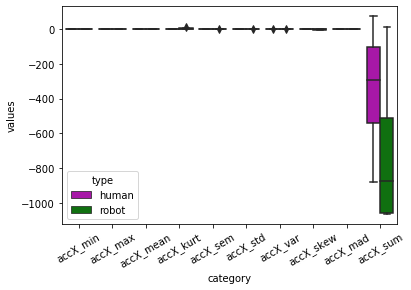

In [16]:
df_accXs = transformer(df_human_accXs, df_robot_accXs)

ax = sns.boxplot(x='category', y='values',
            hue='type', palette=["m", "g"],
            data=df_accXs)
# sns.despine(offset=10, trim=True)

ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()
# plt.savefig('/home/ss26/Projects/Smart-Tools/progress/apr5/sensor_comparisons/accX.png', dpi=600)

In [17]:
df_accXs

,values,category,type
accX_min,-0.759662,accX_min,human
accX_max,-0.087080,accX_max,human
accX_mean,-0.415359,accX_mean,human
accX_kurt,-0.706525,accX_kurt,human
accX_sem,0.001861,accX_sem,human
...,...,...,...
accX_std,0.005855,accX_std,robot
accX_var,0.000034,accX_var,robot
accX_skew,-4.807408,accX_skew,robot
accX_mad,0.004288,accX_mad,robot


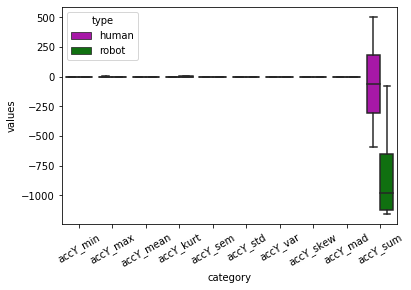

In [74]:
df_accYs = transformer(df_human_accYs, df_robot_accYs)
ax = sns.boxplot(x='category', y='values',
            hue='type', palette=["m", "g"],
            data=df_accYs)
# sns.despine(offset=10, trim=True)

ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
# plt.show()
plt.savefig('/home/ss26/Projects/Smart-Tools/progress/apr5/sensor_comparisons/accY.png', dpi=600)

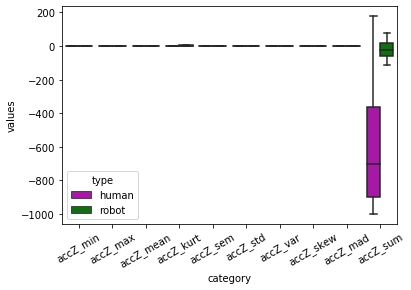

In [76]:
df_accZs = transformer(df_human_accZs, df_robot_accZs)
ax = sns.boxplot(x='category', y='values',
            hue='type', palette=["m", "g"],
            data=df_accZs)
# sns.despine(offset=10, trim=True)

ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
# plt.show()
plt.savefig('/home/ss26/Projects/Smart-Tools/progress/apr5/sensor_comparisons/accZ.png', dpi=600)

In [34]:
df_robot = pd.read_parquet('/home/ss26/Projects/Smart-Tools/data/S2023_Yaskawa_Smoothened_Cleaned.parquet')
df_human = pd.read_parquet('/home/ss26/Projects/Smart-Tools/data/F2021_Human_Smoothened_Cleaned.parquet')

df_robot = df_robot.iloc[:, :-1]
df_human = df_human.iloc[:, :-1]
for column in df_robot.columns:
    df_robot[column] = df_robot[column] / df_robot[column].abs().max()

for column in df_human.columns:
    df_human[column] = df_human[column] / df_human[column].abs().max()

In [35]:
def transformer(df1, df2):
    df1_modified = pd.DataFrame()
    quantile_ranges = list(np.arange(0, 1, 0.01))
    
    def quantile_vals(df, quantile_ranges):
        return [df.quantile(q) for q in quantile_ranges] 

    df1_modified['values'] = pd.concat(quantile_vals(df1, quantile_ranges), ignore_index=False)
    df1_modified['category'] = df1_modified.index
    df1_modified['type'] = 'human'

    df2_modified = pd.DataFrame()
    df2_modified['values'] = pd.concat(quantile_vals(df2, quantile_ranges), ignore_index=False)
    df2_modified['category'] = df2_modified.index
    df2_modified['type'] = 'robot'

    df_proc = pd.concat([df1_modified, df2_modified])
    return df_proc

In [36]:
raw_df_boxplot = transformer(df_human, df_robot)

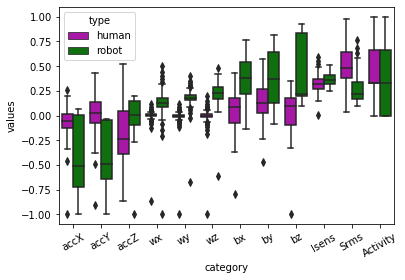

In [33]:
ax = sns.boxplot(x='category', y='values',
            hue='type', palette=["m", "g"],
            data=raw_df_boxplot)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
# plt.show()

plt.savefig('/home/ss26/Projects/Smart-Tools/progress/apr5/sensor_comparisons/sensor_comparisons.png', dpi=600)